In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas

from juhalib import stuffr

In [2]:
TFREQ = 0.1 * 9.9951e4

NTHETA = 50
NB = 20

FFT_SIZE = 4096
BUF_SIZE = 4096

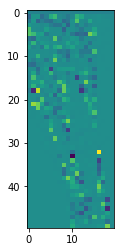

In [3]:
houghm = np.loadtxt('../data/out/hough_table.csv')
plt.imshow(houghm)
plt.show()

In [4]:
 def func2matidx(func, xrange, yrange, dx=0.05):
    '''Get indicies of a matrix that represent the output of a function plotted on that matrix'''
    xs = np.arange(0, xrange - 1, dx) # construct domain
    ys = func(xs) # evaluate function on domain
    
    # Clip to codomain
    xs = xs[np.logical_and(ys < yrange, ys >= 0).nonzero()].astype(int)
    ys = ys[np.logical_and(ys < yrange, ys >= 0).nonzero()].astype(int)
    
    return [xs, ys]

def tbline(theta, b):
    '''Return a function for a line parametrized by theta and its y-intercept (b)'''
    return lambda x: np.tan(theta) * x - b

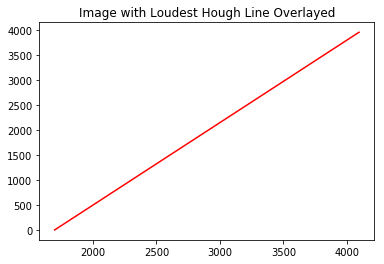

In [5]:
[tlr, blr] = np.unravel_index(np.argmax(houghm), houghm.shape)

tl = np.linspace(0, np.pi / 2, NTHETA)[tlr]
bl = np.linspace(-FFT_SIZE, FFT_SIZE, NB)[blr]

xl = np.arange(0, BUF_SIZE, 1)
func = tbline(tl, bl)
yl = func(xl)

xl = xl[np.logical_and(yl < BUF_SIZE, yl >= 0).nonzero()].astype(int)
yl = yl[np.logical_and(yl < BUF_SIZE, yl >= 0).nonzero()].astype(int)

# plt.imshow(np.flip(img, axis=1), origin='lower')
plt.plot(xl, yl, 'r')
plt.title('Image with Loudest Hough Line Overlayed')
plt.show()

In [15]:
f = scipy.fromfile(open('../data/out/real_nofilt_nodecim_adj.out'), dtype=scipy.complex64) 
DECIM_SR = 50e6 / 100

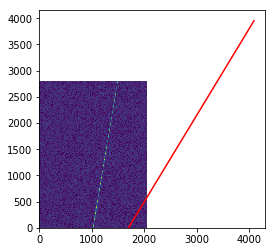

In [23]:
S = stuffr.spectrogram(f, 2048)
S = stuffr.medianEqualize(S)
# S = np.transpose(stuffr.comprz_dB(S[:, ::-1]))
S = stuffr.comprz_dB(S[:, ::-1])
n
# plt.imshow(S)
plt.imshow(np.flip(S, axis=1), origin='lower')
plt.plot(xl, yl, 'r')
plt.show()